In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import dtale as dt
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
estate = pd.read_csv('../data/realEstate.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
estate.shape

(6762, 30)

In [4]:
estate.head()

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,...,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
0,1495817,4596035,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,"['014958174_1659666836308.jpg', '014958178_165...","['2022-08-06', '12:22:15']",3,0.0,2,...,15.0,15.0,owner,"['2022-08-05', '02:44:23']",5.00,NaN,Thamer,True,17,False
1,496663,4599813,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,"['004966630_1659781493595.jpg', '004966636_165...","['2022-08-06', '10:27:57']",3,1.0,2,...,NaN,NaN,exclusive_marketer,"['2022-08-06', '10:27:56']",4.33,yes,الاركان الثابته للعقارات,True,5,True
2,2412431,4554519,شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...,22000,شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...,"['023243548_1658701693777.jpg', '023243549_165...","['2022-08-06', '06:59:03']",3,1.0,2,...,10.0,20.0,normal_marketer,"['2022-07-24', '22:27:27']",4.67,NaN,مكتب منزلك الفاخر,True,15,True
3,1906500,4120004,شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...,38000,شقه عوائل نظيفه جدا \r\nغرفه كبيره وصاله كبيره...,"['019065004_1659758037501.jpg', '019065000_165...","['2022-08-06', '03:52:58']",1,1.0,1,...,NaN,NaN,owner,"['2022-03-10', '09:17:01']",4.17,NaN,ابو مصطفى,True,165,False
4,1741562,4498954,شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...,25000,غرفه وصاله وحمام راكب مطبخ\r\nراكب مكيفات مؤثث...,"['017415629_1657025837185.jpg', '017415620_165...","['2022-08-03', '10:53:47']",1,1.0,1,...,7.0,9.0,normal_marketer,"['2022-07-05', '13:03:54']",4.42,NaN,عقار المستقبل,True,48,False


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [5]:
estate.head(2)

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,...,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
0,1495817,4596035,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,"['014958174_1659666836308.jpg', '014958178_165...","['2022-08-06', '12:22:15']",3,0.0,2,...,15.0,15.0,owner,"['2022-08-05', '02:44:23']",5.00,NaN,Thamer,True,17,False
1,496663,4599813,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,"['004966630_1659781493595.jpg', '004966636_165...","['2022-08-06', '10:27:57']",3,1.0,2,...,NaN,NaN,exclusive_marketer,"['2022-08-06', '10:27:56']",4.33,yes,الاركان الثابته للعقارات,True,5,True


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### <span style="color:blue"> **Source:** *ABDULMALIK M*</span>
#### <span style="color:blue"> **License:** *Not specified but the Usability is 7.06*</span>

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### <span style="color:blue"> **Timeliness:** *Expected update frequency Not specified - Last Updated 2 Yerss Ago*</span>

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### <span style="color:blue"> **Consistency:** *Only one file*</span>

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [6]:
estate.dtypes

user_id              int64
id                   int64
title               object
price                int64
content             object
imgs                object
refresh             object
beds                 int64
livings            float64
wc                   int64
area               float64
street_width       float64
age                float64
last_update         object
ketchen            float64
ac                 float64
furnished          float64
location            object
path                object
district            object
width              float64
length             float64
advertiser_type     object
create_time         object
review             float64
profileImg          object
UserName            object
iam_verified        object
onMarket             int64
IsRent                bool
dtype: object

In [7]:
estate.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'onMarket', 'IsRent'],
      dtype='object')

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [8]:
estate.duplicated().sum()

0

In [9]:
# go to delete duplicates columns
# Nothing To Delete

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [10]:
#Display number missing values per column
estate.isna().sum()

user_id               0
id                    0
title                 0
price                 0
content              94
imgs                643
refresh               0
beds                  0
livings               2
wc                    0
area                175
street_width        210
age                 705
last_update           0
ketchen              17
ac                   19
furnished            45
location              0
path                  0
district              0
width              2100
length             2100
advertiser_type     240
create_time           0
review              399
profileImg         2746
UserName             93
iam_verified        146
onMarket              0
IsRent                0
dtype: int64

In [11]:
null_columns = estate.columns[estate.isnull().any()]
null_columns

Index(['content', 'imgs', 'livings', 'area', 'street_width', 'age', 'ketchen',
       'ac', 'furnished', 'width', 'length', 'advertiser_type', 'review',
       'profileImg', 'UserName', 'iam_verified'],
      dtype='object')

In [12]:
# go to clean them 
# Will Do It in Cleaning Section

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [13]:
# check columns types 
estate.dtypes

user_id              int64
id                   int64
title               object
price                int64
content             object
imgs                object
refresh             object
beds                 int64
livings            float64
wc                   int64
area               float64
street_width       float64
age                float64
last_update         object
ketchen            float64
ac                 float64
furnished          float64
location            object
path                object
district            object
width              float64
length             float64
advertiser_type     object
create_time         object
review             float64
profileImg          object
UserName            object
iam_verified        object
onMarket             int64
IsRent                bool
dtype: object

In [14]:
# go to clean them 
# ID, content, imgs, refresh, last_update, path, width, length, create_time, profileImg.

In [15]:
temp = estate[['id', 'content', 'imgs', 'refresh', 'last_update', 'path', 'width', 'length', 'create_time', 'profileImg']].copy()

In [16]:
temp.columns

Index(['id', 'content', 'imgs', 'refresh', 'last_update', 'path', 'width',
       'length', 'create_time', 'profileImg'],
      dtype='object')

In [17]:
estate = estate.drop(['id', 'content', 'imgs', 'refresh', 'last_update', 'path', 'width', 'length', 'create_time', 'profileImg'],axis=1)

In [18]:
estate.columns

Index(['user_id', 'title', 'price', 'beds', 'livings', 'wc', 'area',
       'street_width', 'age', 'ketchen', 'ac', 'furnished', 'location',
       'district', 'advertiser_type', 'review', 'UserName', 'iam_verified',
       'onMarket', 'IsRent'],
      dtype='object')

In [19]:
estate.head(5)

,user_id,title,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,location,district,advertiser_type,review,UserName,iam_verified,onMarket,IsRent
0,1495817,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,"{'lat': 24.80093, 'lng': 46.89689, '__typename...",حي النظيم,owner,5.00,Thamer,True,17,False
1,496663,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,3,1.0,2,130.0,30.0,12.0,1.0,0.0,0.0,"{'lat': 24.687521, 'lng': 46.807558, '__typena...",حي الفيحاء,exclusive_marketer,4.33,الاركان الثابته للعقارات,True,5,True
2,2412431,شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...,22000,3,1.0,2,200.0,25.0,NaN,0.0,0.0,0.0,"{'lat': 24.921463, 'lng': 46.80627, '__typenam...",حي الرمال,normal_marketer,4.67,مكتب منزلك الفاخر,True,15,True
3,1906500,شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...,38000,1,1.0,1,120.0,34.0,0.0,1.0,1.0,0.0,"{'lat': 24.780059, 'lng': 46.630602, '__typena...",حي العقيق,owner,4.17,ابو مصطفى,True,165,False
4,1741562,شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...,25000,1,1.0,1,60.0,39.0,9.0,1.0,1.0,0.0,"{'lat': 24.771793, 'lng': 46.698757, '__typena...",حي التعاون,normal_marketer,4.42,عقار المستقبل,True,48,False


#### <span style="color:blue"> **iam_verified:** *is the advertiser verified or not*</span>
#### <span style="color:blue"> **onMarket:** *how long is the post posted the time from the creation of the post till today*</span>
#### <span style="color:blue"> **isRent:** *check if the apartment rented or not*</span>

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [20]:
# check outliers 

In [21]:
estate.head(2)

,user_id,title,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,location,district,advertiser_type,review,UserName,iam_verified,onMarket,IsRent
0,1495817,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,"{'lat': 24.80093, 'lng': 46.89689, '__typename...",حي النظيم,owner,5.00,Thamer,True,17,False
1,496663,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,3,1.0,2,130.0,30.0,12.0,1.0,0.0,0.0,"{'lat': 24.687521, 'lng': 46.807558, '__typena...",حي الفيحاء,exclusive_marketer,4.33,الاركان الثابته للعقارات,True,5,True


In [22]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
price_Q1 = estate['price'].quantile(0.25)
price_Q3 = estate['price'].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
price_IQR = price_Q3 - price_Q1

# Define the lower and upper bounds for the outliers
price_lower_bound = price_Q1 - 1.5 * price_IQR
price_upper_bound = price_Q3 + 1.5 * price_IQR

# # Filter out outliers
estate[(estate['price'] > 100000)]

,user_id,title,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,location,district,advertiser_type,review,UserName,iam_verified,onMarket,IsRent
77,366114,شقة للإيجار في شارع الإمام سعود بن فيصل ، حي ح...,120000,3,2.0,3,150.0,20.0,1.0,1.0,1.0,0.0,"{'lat': 24.778521, 'lng': 46.59441, '__typenam...",حي الملقا,exclusive_marketer,3.73,مكتب المسكن الثاني العقارية,True,24,False
93,1168006,شقة للإيجار في شارع رقم 196 ، حي الملقا ، الري...,130000,5,2.0,4,250.0,25.0,0.0,1.0,1.0,1.0,"{'lat': 24.791285, 'lng': 46.596909, '__typena...",حي الملقا,exclusive_marketer,4.69,مؤسسة باب المسكن للعقارات,True,83,False
94,109604,شقة للإيجار في حي ، شارع فارس الازدي ، حي القي...,120000,3,1.0,3,140.0,30.0,0.0,0.0,1.0,0.0,"{'lat': 24.822202, 'lng': 46.598727, '__typena...",حي القيروان,normal_marketer,4.34,مكتب رموز العدل للعقارات,True,60,False
102,158296,شقة للإيجار في شارع الغطغط ، حي الربيع ، الريا...,135000,2,1.0,2,100.0,36.0,4.0,1.0,1.0,1.0,"{'lat': 24.788622, 'lng': 46.654951, '__typena...",حي الربيع,agent,4.57,MBF,True,92,False
183,120924,شقة للإيجار في شارع رقم 468 ، حي الملقا ، الري...,120000,3,2.0,4,250.0,40.0,0.0,1.0,1.0,0.0,"{'lat': 24.813911, 'lng': 46.61446, '__typenam...",حي الملقا,exclusive_marketer,4.54,مؤسسة عثمان العبرة العقارية,True,30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6623,1350258,شقة للإيجار في شارع الوفاء ، حي الملقا ، الريا...,150000,2,1.0,3,150.0,5.0,1.0,1.0,1.0,1.0,"{'lat': 24.780149, 'lng': 46.587238, '__typena...",حي الملقا,agent,NaN,ف123,True,31,True
6625,692078,شقة للإيجار في شارع رقم 335 ، حي المونسية ، ال...,250000,3,1.0,2,NaN,NaN,NaN,1.0,0.0,0.0,"{'lat': 24.83811, 'lng': 46.779102, '__typenam...",حي المونسية,normal_marketer,4.24,مؤسسة المسكن المفضل للخدمات العقارية,True,40,True
6668,454504,شقة للإيجار في شارع وادي هجر ، حي الملقا ، الر...,140000,4,1.0,4,265.0,5.0,1.0,1.0,1.0,1.0,"{'lat': 24.811712, 'lng': 46.603741, '__typena...",حي الملقا,owner,5.00,محمدعلي,True,30,False
6670,403394,شقة للإيجار في شارع رقم 29 ، حي الشهداء ، الري...,220000,3,0.0,2,120.0,5.0,NaN,1.0,1.0,0.0,"{'lat': 24.792513, 'lng': 46.731499, '__typena...",حي الشهداء,exclusive_marketer,4.36,سمات المساكن,True,18,True


In [23]:
estate.shape

(6762, 20)

In [24]:
# Calculate the z-score for each data point in the 'data' column
estate['price_z_score'] = zscore(estate['price'])

# Filter the DataFrame to remove outliers
estate[(estate['price_z_score'] > 100000)].shape

(0, 21)

In [25]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [26]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [27]:
# go to delete ouliers


## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [28]:
estate.isnull().sum().sort_values(ascending = False)

age                705
review             399
advertiser_type    240
street_width       210
area               175
iam_verified       146
UserName            93
furnished           45
ac                  19
ketchen             17
livings              2
IsRent               0
onMarket             0
user_id              0
district             0
location             0
title                0
wc                   0
beds                 0
price                0
price_z_score        0
dtype: int64

In [29]:
estate[estate['age'].isnull()]

,user_id,title,price,beds,livings,wc,area,street_width,age,ketchen,...,furnished,location,district,advertiser_type,review,UserName,iam_verified,onMarket,IsRent,price_z_score
2,2412431,شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...,22000,3,1.0,2,200.0,25.0,NaN,0.0,...,0.0,"{'lat': 24.921463, 'lng': 46.80627, '__typenam...",حي الرمال,normal_marketer,4.67,مكتب منزلك الفاخر,True,15,True,-0.737198
14,2651072,شقة للإيجار في شارع رقم 108 ، حي المونسية ، ال...,28000,3,1.0,2,450.0,15.0,NaN,0.0,...,0.0,"{'lat': 24.823172, 'lng': 46.762318, '__typena...",حي المونسية,agent,NaN,ابو علي,True,26,True,-0.529289
18,2072661,شقة للإيجار في شارع برودان ، حي القيروان ، الر...,85000,4,1.0,3,208.0,35.0,NaN,1.0,...,0.0,"{'lat': 24.828261, 'lng': 46.585809, '__typena...",حي القيروان,owner,4.26,مكتب عقاري مميز,True,59,False,1.445846
20,207685,شقة للإيجار في شارع الشوكي ، حي الفاخرية ، الر...,10000,1,1.0,1,50.0,5.0,NaN,0.0,...,0.0,"{'lat': 24.644058, 'lng': 46.68697, '__typenam...",حي الفاخرية,owner,4.47,ابو تركي,True,76,False,-1.153016
24,1064726,شقة للإيجار في شارع الشيخ عبدالوهاب بن عبدالله...,15000,1,0.0,1,85.0,65.0,NaN,1.0,...,1.0,"{'lat': 24.782621, 'lng': 46.714996, '__typena...",حي الازدهار,exclusive_marketer,4.47,أصول الخبرة,True,32,False,-0.979759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6736,719522,شقة للإيجار في شارع الحفناوي ، حي العارض ، الر...,30000,3,1.0,2,130.0,15.0,NaN,1.0,...,0.0,"{'lat': 24.869963, 'lng': 46.630573, '__typena...",حي العارض,normal_marketer,4.28,مؤسسة دار مسك للتطوير والاستثمار العقاري,True,71,False,-0.459986
6738,53924,شقة للإيجار في شارع رقم 129 ، حي الياسمين ، ال...,30000,3,1.0,2,375.0,5.0,NaN,1.0,...,0.0,"{'lat': 24.829929, 'lng': 46.643005, '__typena...",حي الياسمين,normal_marketer,4.15,مكتب الدواي شمال الرياض,True,31,False,-0.459986
6740,276956,شقة للإيجار في شارع القلعة ، حي الياسمين ، الر...,15000,1,0.0,1,25.0,30.0,NaN,0.0,...,0.0,"{'lat': 24.810818, 'lng': 46.657654, '__typena...",حي الياسمين,agent,3.67,0500021693,True,17,False,-0.979759
6746,1837834,شقة للإيجار في شارع نفيع بن المعلي ، حي الملز ...,27000,2,1.0,2,70.0,40.0,NaN,1.0,...,0.0,"{'lat': 24.669586, 'lng': 46.735622, '__typena...",حي الملز,exclusive_marketer,4.50,مؤسسة بنادر نجد العقارية,True,15,True,-0.563941


In [30]:
estate[estate['age'].isnull()].isnull().sum()

user_id              0
title                0
price                0
beds                 0
livings              0
wc                   0
area                33
street_width        35
age                705
ketchen              0
ac                   1
furnished            2
location             0
district             0
advertiser_type     47
review              43
UserName            10
iam_verified        34
onMarket             0
IsRent               0
price_z_score        0
dtype: int64

In [31]:
estate.dropna(subset=['street_width', 'UserName', 'area', 'street_width', 'advertiser_type'], inplace=True)

In [32]:
estate.dropna(subset=['age'], inplace=True)

In [33]:
estate.isnull().sum().sort_values(ascending = False)

review             326
iam_verified        56
furnished           22
ac                   6
ketchen              5
livings              1
location             0
IsRent               0
onMarket             0
UserName             0
advertiser_type      0
district             0
user_id              0
title                0
age                  0
street_width         0
area                 0
wc                   0
beds                 0
price                0
price_z_score        0
dtype: int64

In [34]:
estate.head(2)

,user_id,title,price,beds,livings,wc,area,street_width,age,ketchen,...,furnished,location,district,advertiser_type,review,UserName,iam_verified,onMarket,IsRent,price_z_score
0,1495817,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,3,0.0,2,225.0,15.0,9.0,1.0,...,0.0,"{'lat': 24.80093, 'lng': 46.89689, '__typename...",حي النظيم,owner,5.00,Thamer,True,17,False,-0.806501
1,496663,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,3,1.0,2,130.0,30.0,12.0,1.0,...,0.0,"{'lat': 24.687521, 'lng': 46.807558, '__typena...",حي الفيحاء,exclusive_marketer,4.33,الاركان الثابته للعقارات,True,5,True,-0.633244


In [35]:
estate[estate['ac'].isnull()]

,user_id,title,price,beds,livings,wc,area,street_width,age,ketchen,...,furnished,location,district,advertiser_type,review,UserName,iam_verified,onMarket,IsRent,price_z_score
2514,7,شقة للإيجار في شارع الريان ، حي النفل ، الرياض...,90000,3,1.0,3,140.0,36.0,0.0,NaN,...,0.0,"{'lat': 24.775261, 'lng': 46.675028, '__typena...",حي النفل,exclusive_marketer,3.89,مكتب وادي المياه للعقارات,True,123,True,1.619104
3121,321665,شقة للإيجار في شارع أبي الدرداء ، حي الروضة ، ...,47000,7,3.0,3,189.0,1.0,20.0,1.0,...,NaN,"{'lat': 24.733604, 'lng': 46.756876, '__typena...",حي الروضة,owner,5.00,الدفع للعقارات,True,25,False,0.129089
3184,2617184,شقة للإيجار في شارع ابن معتوق ، حي أم الحمام ا...,65000,3,2.0,3,170.0,15.0,0.0,NaN,...,NaN,"{'lat': 24.685012, 'lng': 46.644168, '__typena...",حي ام الحمام الغربي,exclusive_marketer,5.00,شركة بواكير للتطوير العقاري,True,21,False,0.752816
3814,2529902,شقة للإيجار في شارع الامير سلمان بن محمد بن سع...,40000,4,1.0,2,144.0,36.0,10.0,NaN,...,NaN,"{'lat': 24.802007, 'lng': 46.642336, '__typena...",حي الصحافة,exclusive_marketer,5.00,شركة نمو الأصول العقارية,True,16,True,-0.113471
3929,717659,شقة للإيجار في شارع رقم 352 ، حي النرجس ، الري...,36000,3,1.0,2,150.0,15.0,0.0,1.0,...,NaN,"{'lat': 24.83707, 'lng': 46.682549, '__typenam...",حي النرجس,exclusive_marketer,4.25,مكتب وليد حسن بن ياسين الشبيب للعقارات,True,32,True,-0.252077
4983,321665,شقة للإيجار في شارع أبي الدرداء ، حي الروضة ، ...,47000,7,3.0,3,189.0,1.0,20.0,1.0,...,NaN,"{'lat': 24.733604, 'lng': 46.756876, '__typena...",حي الروضة,owner,5.00,الدفع للعقارات,True,25,False,0.129089


In [36]:
estate[estate['review'].isnull()]

,user_id,title,price,beds,livings,wc,area,street_width,age,ketchen,...,furnished,location,district,advertiser_type,review,UserName,iam_verified,onMarket,IsRent,price_z_score
43,1675344,شقة للإيجار في شارع عبدالرحمن الناصر ، حي الخل...,16000,2,1.0,1,80.0,30.0,17.0,1.0,...,0.0,"{'lat': 24.762967, 'lng': 46.785802, '__typena...",حي الخليج,exclusive_marketer,NaN,مگـتب التميــّـز للعقـارات,True,23,False,-0.945107
72,547356,شقة للإيجار في شارع محمد بن عجلان ، حي الرمال ...,23000,3,1.0,2,100.0,20.0,0.0,0.0,...,0.0,"{'lat': 24.932028, 'lng': 46.798199, '__typena...",حي الرمال,owner,NaN,👤👤👤,True,20,False,-0.702547
92,805045,شقة للإيجار في شارع أبي الخير بن محمد الطبري ،...,24000,4,1.0,3,150.0,22.0,0.0,1.0,...,0.0,"{'lat': 24.923487, 'lng': 46.821186, '__typena...",حي الرمال,owner,NaN,0540474600,True,5,True,-0.667895
100,2644687,شقة للإيجار في شارع طريف ، حي النرجس ، الرياض ...,80000,3,1.0,3,145.0,60.0,0.0,1.0,...,0.0,"{'lat': 24.834434, 'lng': 46.667606, '__typena...",حي النرجس,normal_marketer,NaN,mohammed ali,True,33,False,1.272589
123,2651889,شقة للإيجار في شارع النجاح ، حي اليرموك ، الري...,18000,1,0.0,1,50.0,100.0,0.0,1.0,...,0.0,"{'lat': 24.80773, 'lng': 46.801785, '__typenam...",حي اليرموك,owner,NaN,شركة ملاك العقارية,True,23,False,-0.875804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6674,330787,شقة للإيجار في شارع رقم 326 ، حي ظهرة لبن ، ال...,24000,4,1.0,2,225.0,20.0,4.0,0.0,...,0.0,"{'lat': 24.621582, 'lng': 46.513054, '__typena...",حي ظهرة لبن,owner,NaN,محمد الشهراني,True,20,False,-0.667895
6703,2279515,شقة للإيجار في شارع الامير ناصر بن سعود بن فرح...,30000,2,1.0,2,4.0,32.0,4.0,1.0,...,0.0,"{'lat': 24.810226, 'lng': 46.643013, '__typena...",حي الصحافة,exclusive_marketer,NaN,ابو عبد الرحمن,True,19,False,-0.459986
6714,2674632,شقة للإيجار في شارع عبدالباسط الظاهري ، حي الن...,50000,3,1.0,2,300.0,18.0,0.0,1.0,...,0.0,"{'lat': 24.885801, 'lng': 46.633495, '__typena...",حي النرجس,agent,NaN,احمد,True,7,True,0.233044
6715,333737,شقة للإيجار في شارع اللؤلؤة ، حي العارض ، الري...,119000,3,2.0,5,178.0,30.0,0.0,1.0,...,1.0,"{'lat': 24.861568, 'lng': 46.628929, '__typena...",حي العارض,owner,NaN,muhannad_sa,True,24,False,2.623997


In [37]:
estate['review'].fillna('0', inplace=True)

C:\Users\Reyad\AppData\Local\Temp\ipykernel_66076\3127947130.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  estate['review'].fillna('0', inplace=True)


In [38]:
estate['iam_verified'].fillna('0', inplace=True)

In [39]:
estate['furnished'].fillna('0', inplace=True)


C:\Users\Reyad\AppData\Local\Temp\ipykernel_66076\1698634589.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  estate['furnished'].fillna('0', inplace=True)


In [40]:
estate['ac'].fillna('0', inplace=True)

C:\Users\Reyad\AppData\Local\Temp\ipykernel_66076\1337006086.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  estate['ac'].fillna('0', inplace=True)


In [41]:
estate['ketchen'].fillna('0', inplace=True)

C:\Users\Reyad\AppData\Local\Temp\ipykernel_66076\591220142.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  estate['ketchen'].fillna('0', inplace=True)


In [42]:
estate['livings'].fillna('0', inplace=True)

C:\Users\Reyad\AppData\Local\Temp\ipykernel_66076\2190158496.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  estate['livings'].fillna('0', inplace=True)


In [43]:
estate.isnull().sum().sort_values(ascending = False)

user_id            0
furnished          0
IsRent             0
onMarket           0
iam_verified       0
UserName           0
review             0
advertiser_type    0
district           0
location           0
ac                 0
title              0
ketchen            0
age                0
street_width       0
area               0
wc                 0
livings            0
beds               0
price              0
price_z_score      0
dtype: int64

In [44]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [45]:
estate.head()

,user_id,title,price,beds,livings,wc,area,street_width,age,ketchen,...,furnished,location,district,advertiser_type,review,UserName,iam_verified,onMarket,IsRent,price_z_score
0,1495817,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,3,0.0,2,225.0,15.0,9.0,1.0,...,0.0,"{'lat': 24.80093, 'lng': 46.89689, '__typename...",حي النظيم,owner,5.0,Thamer,True,17,False,-0.806501
1,496663,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,3,1.0,2,130.0,30.0,12.0,1.0,...,0.0,"{'lat': 24.687521, 'lng': 46.807558, '__typena...",حي الفيحاء,exclusive_marketer,4.33,الاركان الثابته للعقارات,True,5,True,-0.633244
3,1906500,شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...,38000,1,1.0,1,120.0,34.0,0.0,1.0,...,0.0,"{'lat': 24.780059, 'lng': 46.630602, '__typena...",حي العقيق,owner,4.17,ابو مصطفى,True,165,False,-0.182774
4,1741562,شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...,25000,1,1.0,1,60.0,39.0,9.0,1.0,...,0.0,"{'lat': 24.771793, 'lng': 46.698757, '__typena...",حي التعاون,normal_marketer,4.42,عقار المستقبل,True,48,False,-0.633244
5,970629,شقة للإيجار في شارع القلعة ، حي الياسمين ، الر...,40000,3,1.0,2,170.0,35.0,3.0,0.0,...,0.0,"{'lat': 24.814279, 'lng': 46.65536, '__typenam...",حي الياسمين,normal_marketer,4.47,hythmaltryfy,0,7,True,-0.113471


In [46]:
# Function to extract latitude and longitude from the location column
def extract_coordinates(location_str):
    # Use regular expressions to find lat and lng values
    lat_match = re.search(r"'lat': ([0-9.]+)", location_str)
    lng_match = re.search(r"'lng': ([0-9.]+)", location_str)
    # Extract lat and lng if matches are found, otherwise set as None
    lat = float(lat_match.group(1)) if lat_match else None
    lng = float(lng_match.group(1)) if lng_match else None
    return lat, lng

# Apply the function to the location column
estate[['lat', 'lng']] = estate['location'].apply(lambda loc: pd.Series(extract_coordinates(loc)))

# Drop the original location column
estate.drop(columns=['location'], inplace=True)

# Convert specified columns to integers
columns_to_convert = ['furnished', 'ketchen', 'livings']

# Replace missing values with 0 (or another suitable value) before converting to integer
estate[columns_to_convert] = estate[columns_to_convert].fillna(0).astype(int)

In [47]:
estate.columns

Index(['user_id', 'title', 'price', 'beds', 'livings', 'wc', 'area',
       'street_width', 'age', 'ketchen', 'ac', 'furnished', 'district',
       'advertiser_type', 'review', 'UserName', 'iam_verified', 'onMarket',
       'IsRent', 'price_z_score', 'lat', 'lng'],
      dtype='object')

In [48]:
estate.head()

,user_id,title,price,beds,livings,wc,area,street_width,age,ketchen,...,district,advertiser_type,review,UserName,iam_verified,onMarket,IsRent,price_z_score,lat,lng
0,1495817,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,3,0,2,225.0,15.0,9.0,1,...,حي النظيم,owner,5.0,Thamer,True,17,False,-0.806501,24.800930,46.896890
1,496663,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,3,1,2,130.0,30.0,12.0,1,...,حي الفيحاء,exclusive_marketer,4.33,الاركان الثابته للعقارات,True,5,True,-0.633244,24.687521,46.807558
3,1906500,شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...,38000,1,1,1,120.0,34.0,0.0,1,...,حي العقيق,owner,4.17,ابو مصطفى,True,165,False,-0.182774,24.780059,46.630602
4,1741562,شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...,25000,1,1,1,60.0,39.0,9.0,1,...,حي التعاون,normal_marketer,4.42,عقار المستقبل,True,48,False,-0.633244,24.771793,46.698757
5,970629,شقة للإيجار في شارع القلعة ، حي الياسمين ، الر...,40000,3,1,2,170.0,35.0,3.0,0,...,حي الياسمين,normal_marketer,4.47,hythmaltryfy,0,7,True,-0.113471,24.814279,46.655360


In [49]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [50]:
# Descriptive Statistics for numerical columns
descriptive_stats = estate.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)


Descriptive Statistics:
             user_id          price         beds      livings           wc  \
count  5.673000e+03    5673.000000  5673.000000  5673.000000  5673.000000   
mean   1.343119e+06   43947.191433     2.560903     0.993830     2.078265   
std    8.383448e+05   28761.086272     1.123164     0.469219     0.945561   
min    7.000000e+00      75.000000     1.000000     0.000000     1.000000   
25%    5.880410e+05   25000.000000     2.000000     1.000000     1.000000   
50%    1.223635e+06   35000.000000     3.000000     1.000000     2.000000   
75%    2.089299e+06   60000.000000     3.000000     1.000000     3.000000   
max    2.685054e+06  450000.000000     7.000000     5.000000     5.000000   

               area  street_width          age      ketchen    furnished  \
count  5.673000e+03   5673.000000  5673.000000  5673.000000  5673.000000   
mean   2.123981e+03     23.428874     2.814913     0.871320     0.079323   
std    1.475181e+05     13.190128     4.587837     0

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [51]:
# Frequency tables for categorical variables
categorical_columns = ['advertiser_type', 'UserName', 'iam_verified', 'IsRent']

frequency_tables = {col: estate[col].value_counts() for col in categorical_columns}

for col, freq_table in frequency_tables.items():
    print(f"Frequency Table for {col}:\n{freq_table}\n")

Frequency Table for advertiser_type:
advertiser_type
exclusive_marketer    2106
normal_marketer       1570
owner                 1482
agent                  515
Name: count, dtype: int64

Frequency Table for UserName:
UserName
‏مؤسسة الحلم العربي                         246
بوابه النهضه للخدمات العقاريه               163
مكتب عقاري                                  107
مكتب عقاري مميز                              87
عقار جديد                                    84
                                           ... 
ابراهيم عبدالله                               1
0501000010                                    1
Abu nasser                                    1
مجموعة عادل عبدالله سعود الدخيل العقارية      1
المشاريع الناجحة                              1
Name: count, Length: 1286, dtype: int64

Frequency Table for iam_verified:
iam_verified
True     5606
0          56
False      11
Name: count, dtype: int64

Frequency Table for IsRent:
IsRent
False    3150
True     2523
Name: count, dtype: int64

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


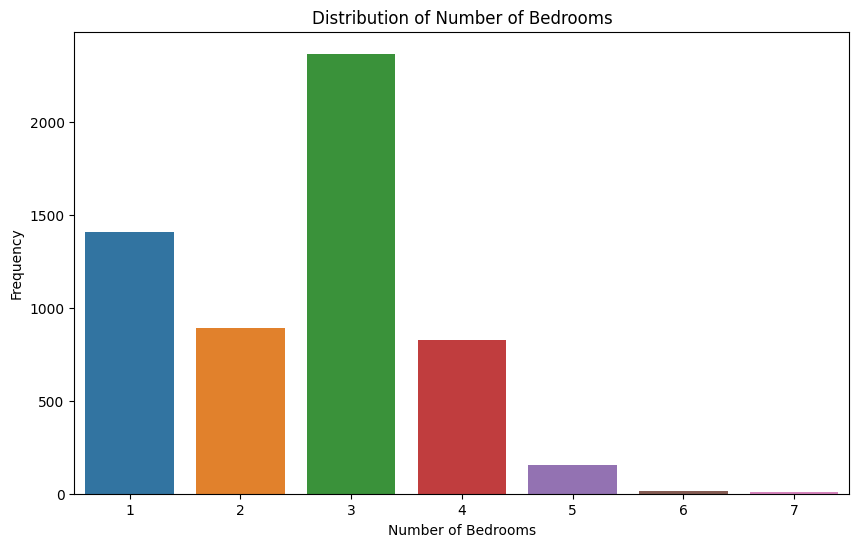

In [52]:
# Bar Chart for Ordinal Data
plt.figure(figsize=(10, 6))
sns.countplot(x='beds', data=estate, order=sorted(estate['beds'].dropna().unique()))
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()


c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


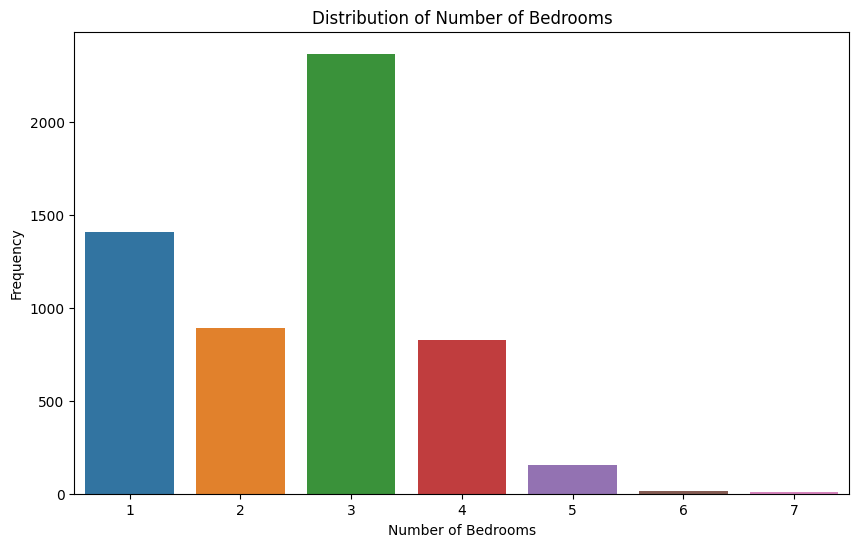

In [53]:
# Bar Chart for Ordinal Data
plt.figure(figsize=(10, 6))
sns.countplot(x='beds', data=estate, order=sorted(estate['beds'].dropna().unique()))
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()


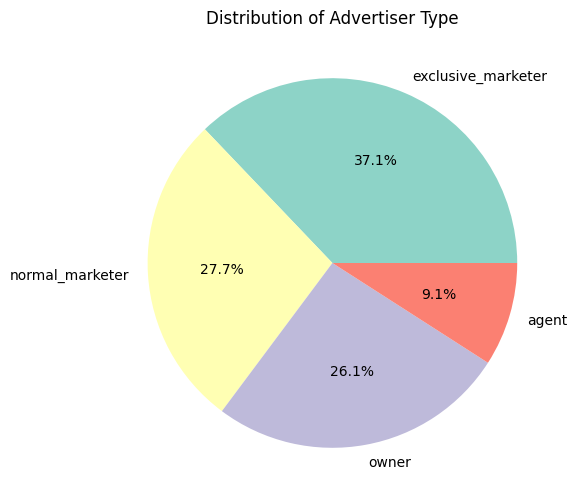

In [54]:
# Pie Chart for Nominal Data
plt.figure(figsize=(10, 6))
estate['advertiser_type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title('Distribution of Advertiser Type')
plt.ylabel('')
plt.show()


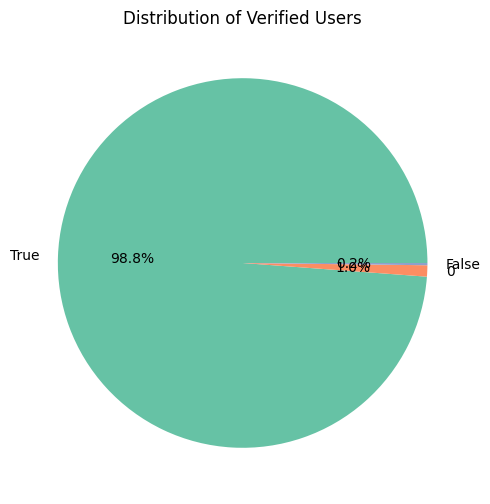

In [55]:
# Pie Chart for Nominal Data
plt.figure(figsize=(10, 6))
estate['iam_verified'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title('Distribution of Verified Users')
plt.ylabel('')
plt.show()


#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


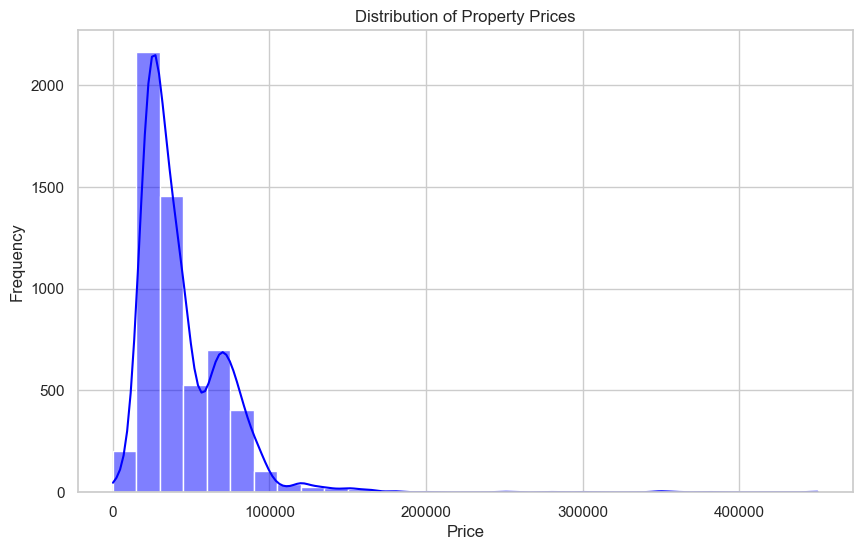

In [56]:
# Set plot style
sns.set(style="whitegrid")

# Plot distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(estate['price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


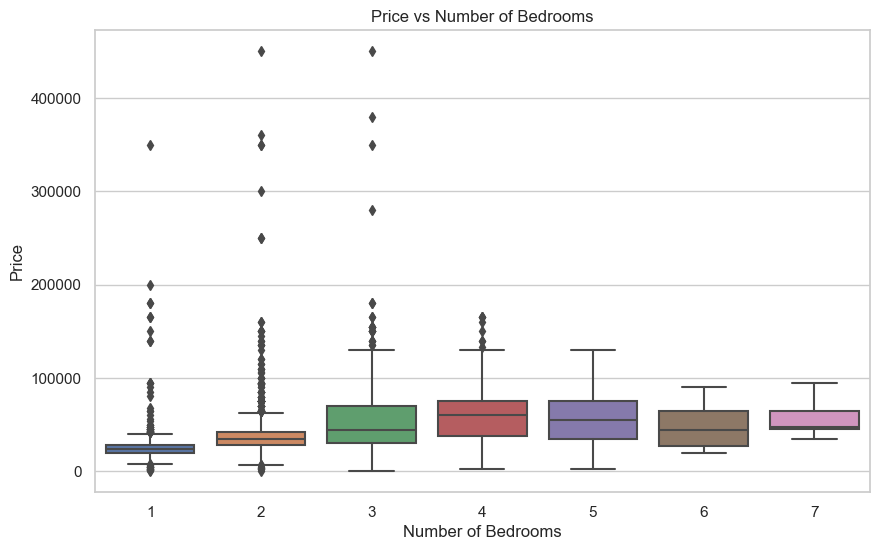

In [57]:
# Plot relationship between price and number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='beds', y='price', data=estate)
plt.title('Price vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


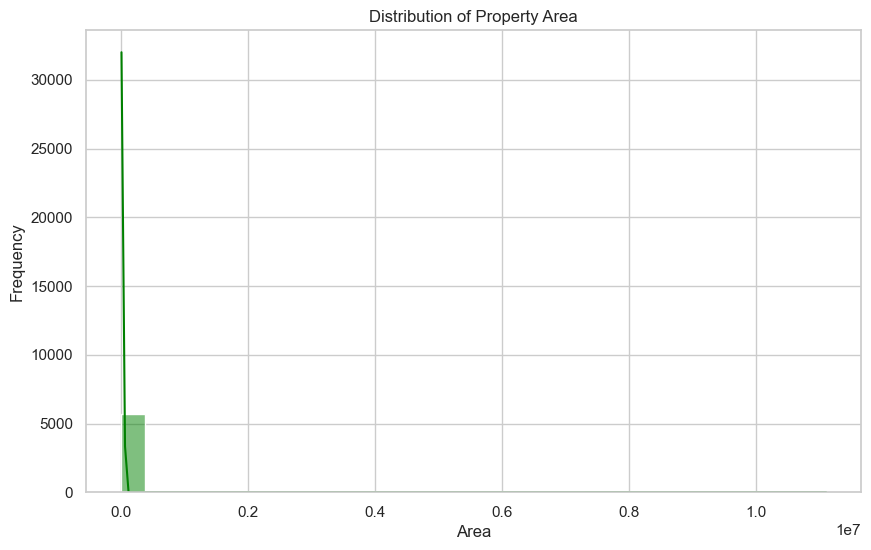

In [58]:
# Plot distribution of area
plt.figure(figsize=(10, 6))
sns.histplot(estate['area'], bins=30, kde=True, color='green')
plt.title('Distribution of Property Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


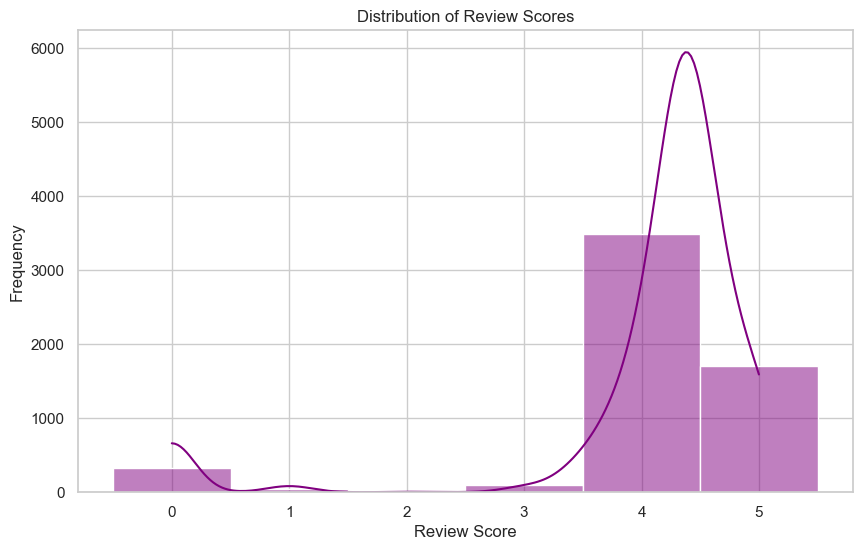

In [59]:
# Plot distribution of review scores
plt.figure(figsize=(10, 6))
sns.histplot(estate['review'], bins=10, kde=True, color='purple')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


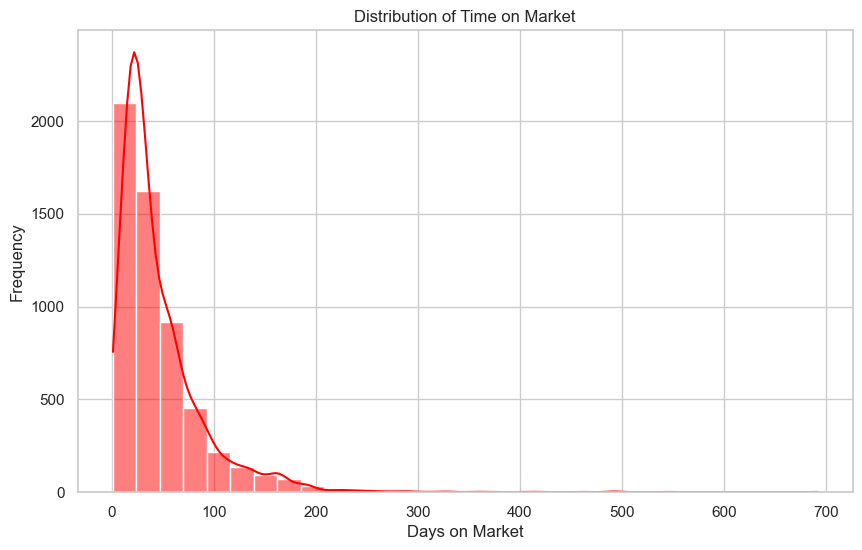

In [60]:
# Plot distribution of time on market
plt.figure(figsize=(10, 6))
sns.histplot(estate['onMarket'], bins=30, kde=True, color='red')
plt.title('Distribution of Time on Market')
plt.xlabel('Days on Market')
plt.ylabel('Frequency')
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [61]:
# Measures of Central Tendency
central_tendency = estate.describe().loc[['mean', '50%']]
central_tendency.rename(index={'50%': 'median'}, inplace=True)
print("Measures of Central Tendency:\n", central_tendency)

Measures of Central Tendency:
              user_id         price      beds  livings        wc         area  \
mean    1.343119e+06  43947.191433  2.560903  0.99383  2.078265  2123.981315   
median  1.223635e+06  35000.000000  3.000000  1.00000  2.000000   150.000000   

        street_width       age  ketchen  furnished   onMarket  price_z_score  \
mean       23.428874  2.814913  0.87132   0.079323  45.968976       0.023305   
median     20.000000  1.000000  1.00000   0.000000  32.000000      -0.286729   

              lat        lng  
mean    24.793955  46.684934  
median  24.807337  46.667235  


In [62]:
# Measures of Variability
variability = estate.describe().loc[['std', 'min', 'max']]
print("Measures of Variability:\n", variability)

Measures of Variability:
           user_id          price      beds   livings        wc          area  \
std  8.383448e+05   28761.086272  1.123164  0.469219  0.945561  1.475181e+05   
min  7.000000e+00      75.000000  1.000000  0.000000  1.000000  1.000000e+00   
max  2.685054e+06  450000.000000  7.000000  5.000000  5.000000  1.111110e+07   

     street_width        age   ketchen  furnished    onMarket  price_z_score  \
std     13.190128   4.587837  0.334875   0.270266   43.972681       0.996615   
min      1.000000   0.000000  0.000000   0.000000    1.000000      -1.496932   
max    100.000000  36.000000  1.000000   1.000000  692.000000      14.093644   

           lat        lng  
std   0.078338   0.081027  
min  24.402878  46.320477  
max  25.179712  46.910900  


In [63]:
# Shape of the Data (Skewness and Kurtosis)
shape_measures = estate[['price', 'area', 'review', 'onMarket']].agg(['skew', 'kurtosis'])
print("Shape of the Data:\n", shape_measures)

Shape of the Data:
               price         area    review   onMarket
skew       3.600697    75.318698 -2.982225   3.362801
kurtosis  32.013403  5672.937443  8.192473  23.766203


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

<Figure size 1000x600 with 0 Axes>

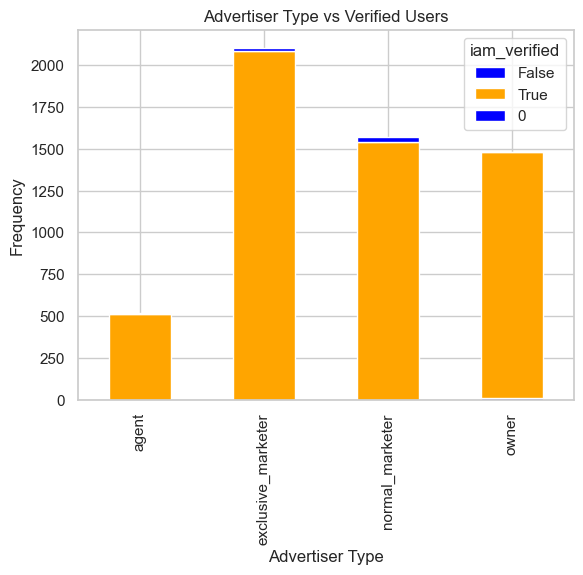

In [64]:
# Stacked Bar Chart for Categorical & Categorical
plt.figure(figsize=(10, 6))
advertiser_verified = pd.crosstab(estate['advertiser_type'], estate['iam_verified'])
advertiser_verified.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Advertiser Type vs Verified Users')
plt.xlabel('Advertiser Type')
plt.ylabel('Frequency')
plt.show()

**Categorical & numerical --> (scatter plot, histogram, box plot)**

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


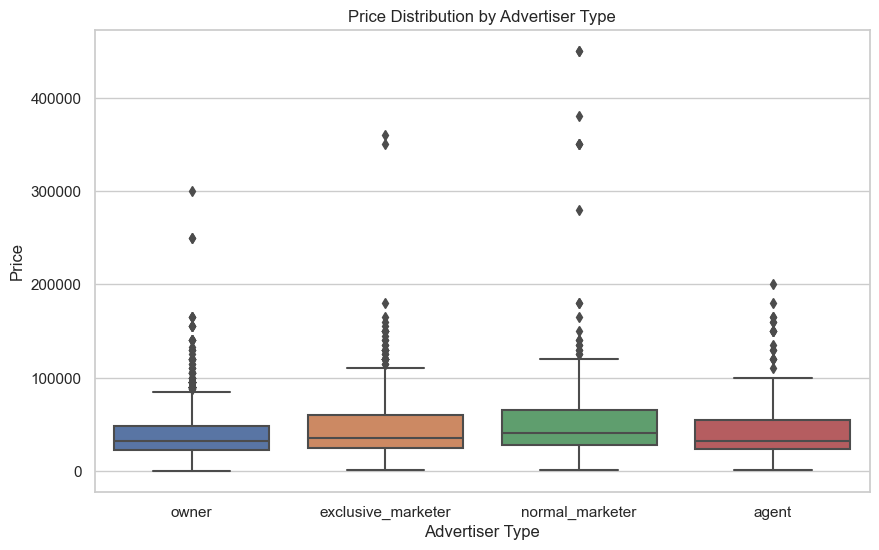

In [65]:
# Box Plot for Categorical & Numerical
plt.figure(figsize=(10, 6))
sns.boxplot(x='advertiser_type', y='price', data=estate)
plt.title('Price Distribution by Advertiser Type')
plt.xlabel('Advertiser Type')
plt.ylabel('Price')
plt.show()

**numerical & numerical --> (Scatter plot, line chart)**

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


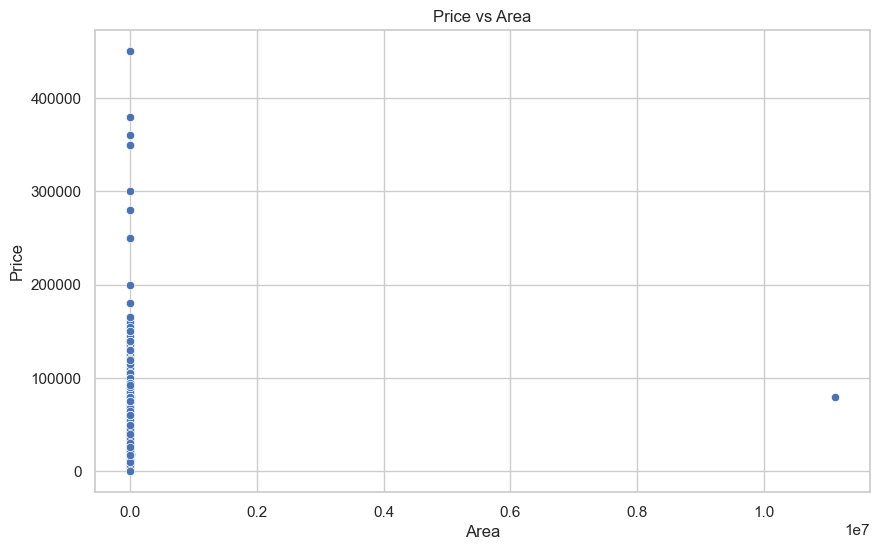

In [66]:
# Scatter Plot for Numerical & Numerical
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=estate)
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

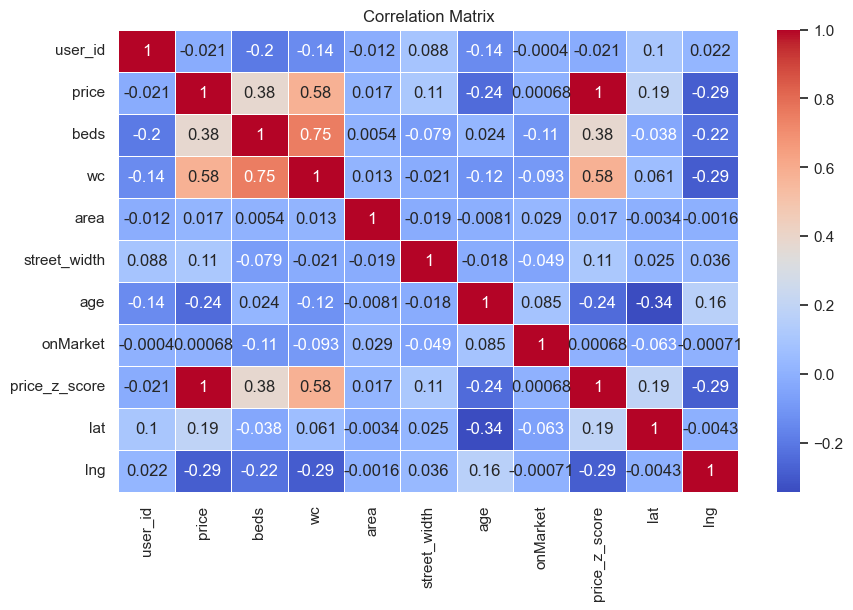

In [67]:
# Select only the numeric columns for the correlation matrix
numeric_columns = estate.select_dtypes(include=['float64', 'int64']).columns
numeric_df = estate[numeric_columns]

# Heat Map for Correlation Matrix
plt.figure(figsize=(10, 6))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

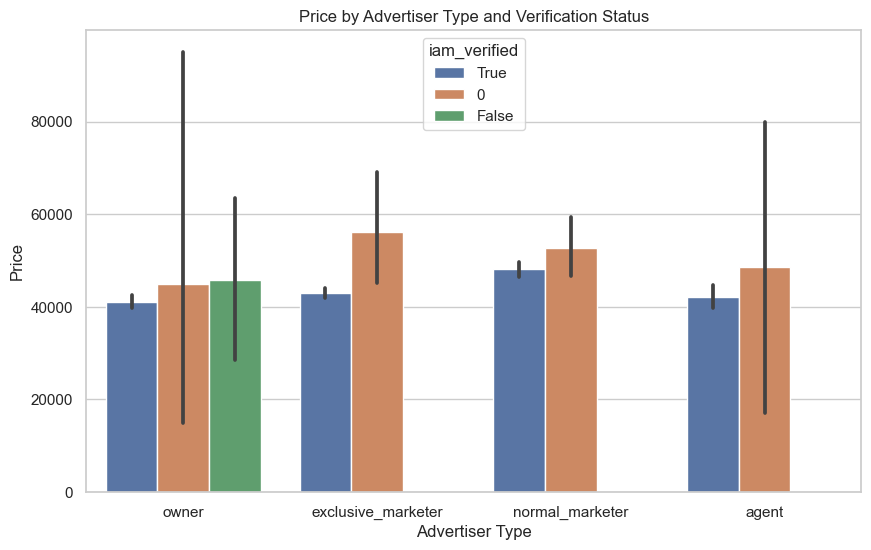

In [68]:
# Bar Chart for Multivariate Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='advertiser_type', y='price', hue='iam_verified', data=estate)
plt.title('Price by Advertiser Type and Verification Status')
plt.xlabel('Advertiser Type')
plt.ylabel('Price')
plt.show()

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


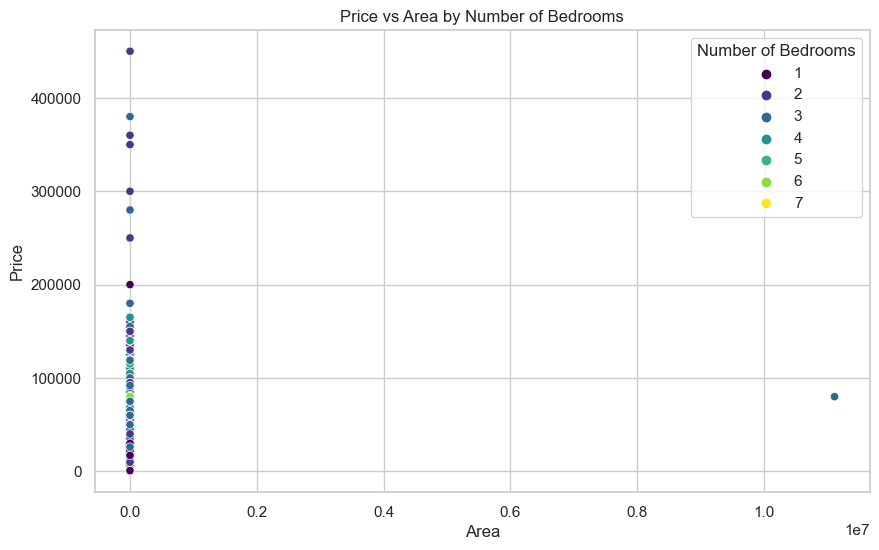

In [69]:
# Scatter Chart for Multivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', hue='beds', palette='viridis', data=estate)
plt.title('Price vs Area by Number of Bedrooms')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend(title='Number of Bedrooms')
plt.show()

c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Reyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

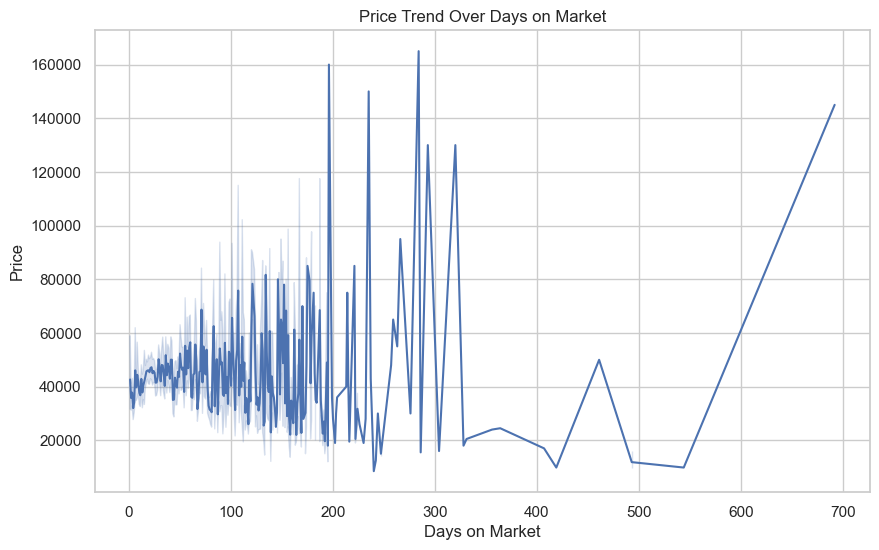

In [70]:
# Line Chart for Multivariate Analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x='onMarket', y='price', data=estate)
plt.title('Price Trend Over Days on Market')
plt.xlabel('Days on Market')
plt.ylabel('Price')
plt.show()

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

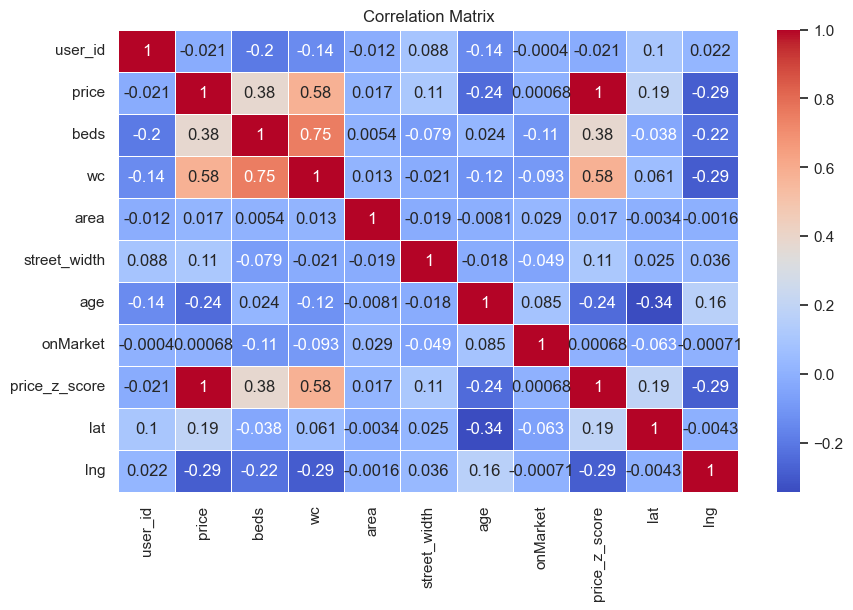

In [71]:
# Select only the numeric columns for the correlation matrix
numeric_columns = estate.select_dtypes(include=['float64', 'int64']).columns
numeric_df = estate[numeric_columns]

# Heat Map for Correlation Matrix
plt.figure(figsize=(10, 6))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [73]:
d = dt.show(estate, host="localhost")

In [74]:
d.open_browser()